Used this notebook to verify death rate per state
Plotted death rate per state

In [65]:
# Import

import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Read CSV files

data2014 = pd.read_csv('CleanDatasets//FIREARMS2014.csv')
data2015 = pd.read_csv('CleanDatasets/FIREARMS2015.csv')
data2016 = pd.read_csv('CleanDatasets/FIREARMS2016.csv')
data2017 = pd.read_csv('CleanDatasets/FIREARMS2017.csv')
dataPop = pd.read_csv('CleanDatasets/us_pops.csv')


In [67]:
# Look at dataset
dataPop.head()

,State Or Region,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
1,Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
2,Arizona,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
3,Arkansas,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
4,California,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"


In [68]:
data2014.head()

,STATE,RATE,DEATHS,URL
0,AL,16.9,815,/nchs/pressroom/states/alabama/alabama.htm
1,AK,19.2,145,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,13.5,927,/nchs/pressroom/states/arizona/arizona.htm
3,AR,16.6,496,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,7.4,"2,942",/nchs/pressroom/states/california/california.htm


In [69]:
# Delete 'URL' column

del data2014['URL']
del data2015['URL']
del data2016['URL']
del data2017['URL']

In [70]:
# Need to remove commas from 'Death' column then covert to numeric

data2014['DEATHS'] = data2014['DEATHS'].apply(lambda x: x.replace(',',''))
data2015['DEATHS'] = data2015['DEATHS'].apply(lambda x: x.replace(',',''))
data2016['DEATHS'] = data2016['DEATHS'].apply(lambda x: x.replace(',',''))
data2017['DEATHS'] = data2017['DEATHS'].apply(lambda x: x.replace(',',''))

data2014['DEATHS'] = pd.to_numeric(data2014['DEATHS'])
data2015['DEATHS'] = pd.to_numeric(data2015['DEATHS'])
data2016['DEATHS'] = pd.to_numeric(data2016['DEATHS'])
data2017['DEATHS'] = pd.to_numeric(data2017['DEATHS'])

In [71]:
# Check data types

data2014.dtypes

STATE      object
RATE      float64
DEATHS      int64
dtype: object

In [60]:
combo2014 = dataPop.merge(data2014, how='outer', left_index=True, right_index=True)

In [61]:
combo2014.head()

,State Or Region,2010,2011,2012,2013,2014,2015,2016,2017,2018,STATE,RATE,DEATHS
0,Alabama,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871",AL,16.9,815.0
1,Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438",AK,19.2,145.0
2,Arizona,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646",AZ,13.5,927.0
3,Arkansas,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825",AR,16.6,496.0
4,California,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045",CA,7.4,2942.0


In [62]:
del combo2014['2010']
del combo2014['2011']
del combo2014['2012']
del combo2014['2013']
del combo2014['2018']
del combo2014['STATE']

In [73]:
combo2014.dtypes

State Or Region     object
2014                object
2015                object
2016                object
2017                object
2018                object
RATE               float64
DEATHS             float64
dtype: object

In [81]:
#combo2014.head()

#combo2014['2014'] = combo2014['2014'].apply(lambda x: x.replace(',',''))
#combo2014['2015'] = combo2014['2015'].apply(lambda x: x.replace(',',''))
#combo2014['2016'] = combo2014['2016'].apply(lambda x: x.replace(',',''))
#combo2014['2017'] = combo2014['2017'].apply(lambda x: x.replace(',',''))

#combo2014['2014'] = pd.to_numeric(combo2014['2014'])
#combo2014['2015'] = pd.to_numeric(combo2014['2015'])
#combo2014['2016'] = pd.to_numeric(combo2014['2016'])
#combo2014['2017'] = pd.to_numeric(combo2014['2017'])

#combo2014['2014'] = combo2014['2014'].convert_objects(convert_numeric=True)

combo2014['2014'] = combo2014['2014'].str.replace(",","").astype(float)
combo2014['2015'] = combo2014['2015'].str.replace(",","").astype(float)
combo2014['2016'] = combo2014['2016'].str.replace(",","").astype(float)
combo2014['2017'] = combo2014['2017'].str.replace(",","").astype(float)

combo2014.head()

,State Or Region,2014,2015,2016,2017,2018,RATE,DEATHS
0,Alabama,4842481.0,4853160.0,4864745.0,4875120.0,"4,887,871",16.9,815.0
1,Alaska,736307.0,737547.0,741504.0,739786.0,"737,438",19.2,145.0
2,Arizona,6733840.0,6833596.0,6945452.0,7048876.0,"7,171,646",13.5,927.0
3,Arkansas,2967726.0,2978407.0,2990410.0,3002997.0,"3,013,825",16.6,496.0
4,California,38625139.0,38953142.0,39209127.0,39399349.0,"39,557,045",7.4,2942.0


In [82]:
combo2014.dtypes

State Or Region     object
2014               float64
2015               float64
2016               float64
2017               float64
2018                object
RATE               float64
DEATHS             float64
dtype: object

In [83]:
death_rate = combo2014['DEATHS']/combo2014['2014'] * 100000
death_rate

0      16.830216
1      19.692873
2      13.766291
3      16.713133
4       7.616801
5      12.389703
6       5.201983
7      10.937212
8     363.766447
9       7.003912
10      0.397259
11     15.054472
12     72.265717
13      6.346516
14      3.655097
15     10.580466
16     21.855316
17     20.296828
18      2.863785
19     41.029186
20      3.793114
21     16.189479
22      3.796351
23     10.033895
24     31.531892
25      2.840021
26     17.516545
27     22.824952
28      4.327757
29     35.102905
30      3.834537
31     41.859179
32      6.135428
33      0.966384
34    164.229667
35      5.265892
36     12.814672
37     35.064653
38      0.265851
39     72.631407
40      1.845021
41    119.657798
42     43.541901
43      1.249206
44      2.349017
45    142.190404
46      8.445544
47      4.055335
48     26.331911
49      1.616836
50           NaN
51           NaN
52           NaN
dtype: float64

In [84]:
data2014.head()

,STATE,RATE,DEATHS
0,AL,16.9,815
1,AK,19.2,145
2,AZ,13.5,927
3,AR,16.6,496
4,CA,7.4,2942


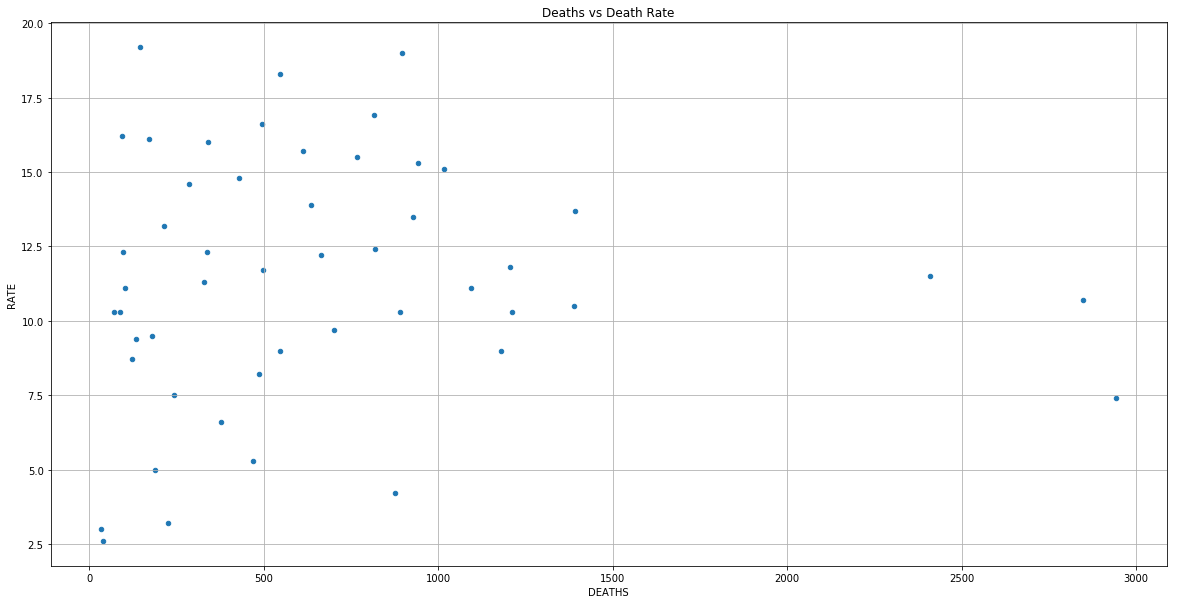

<Figure size 432x288 with 0 Axes>

In [93]:
data2014.plot(kind="scatter", x="DEATHS", y="RATE", grid=True, figsize=(20,10),
              title="Deaths vs Death Rate")
plt.show()
plt.savefig('Figures/Death_Rate/Death_Rate_State.png')